In [1]:
import pandas as pd

import pyteomics.mgf
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

import pandas_utils as pu

In [2]:
def save_fig(file_name):
  plt.savefig(r"C:\git\msn_library\figures/{}.png".format(file_name), dpi=300)
  plt.savefig(r"C:\git\msn_library\figures/{}.pdf".format(file_name))
  plt.savefig(r"C:\git\msn_library\figures/{}.svg".format(file_name))

In [3]:
infile_esi = r"C:\git\msn_library\library\20230811_mce_library_pos_all_lib_MSn.mgf"
infile_apci = r"C:\git\msn_library\library\20230925_mce_library_pos_logp5_apci_MSn.mgf"
libraryfile = r"C:\git\msn_library\data\library\mce_library_logp_min5_min3_in_sample.tsv"

In [4]:
import re

rows = []
counter = 0

with pyteomics.mgf.MGF(infile_esi) as f_in:
  for spectrum_dict in tqdm(f_in):
    if spectrum_dict is not None:
      rows.append(spectrum_dict["params"])
    else:
      counter += 1

df_esi = pd.DataFrame(rows)
if "inchikey" not in df_esi.columns:
  df_esi["inchikey"] = df_esi["inchiaux"]
if "compound_name" not in df_esi.columns:
  df_esi["compound_name"] = df_esi["name"]
if "monoisotopic_mass" not in df_esi.columns:
  df_esi["monoisotopic_mass"] = df_esi["exactmass"]
#
if "usi" in df_esi.columns:
  df_esi["unique_sample_id"] = ["pluskal{}_id".format(re.search(r'pluskal(.*?)_id', usi).group(1))
                                for usi in df_esi["usi"]]


0it [00:00, ?it/s]

In [5]:
import re

rows = []
counter = 0

with pyteomics.mgf.MGF(infile_apci) as f_in:
  for spectrum_dict in tqdm(f_in):
    if spectrum_dict is not None:
      rows.append(spectrum_dict["params"])
    else:
      counter += 1

df_apci = pd.DataFrame(rows)
if "inchikey" not in df_apci.columns:
  df_apci["inchikey"] = df_apci["inchiaux"]
if "compound_name" not in df_apci.columns:
  df_apci["compound_name"] = df_apci["name"]
if "monoisotopic_mass" not in df_apci.columns:
  df_apci["monoisotopic_mass"] = df_apci["exactmass"]
#
if "usi" in df_apci.columns:
  df_apci["unique_sample_id"] = ["pluskal{}_id".format(re.search(r'pluskal(.*?)_id', usi).group(1))
                                 for usi in df_apci["usi"]]

0it [00:00, ?it/s]

In [6]:
libdf = pu.read_dataframe(libraryfile)
libdf = libdf[(libdf["monoisotopic_mass"] > 114) & (libdf["plate_id"] != "07P")]
libdf = libdf[["unique_sample_id"]].drop_duplicates(["unique_sample_id"])
libdf

,unique_sample_id
0,pluskal_mce_1D1_A3_id
3,pluskal_mce_1D1_A4_id
7,pluskal_mce_1D1_A5_id
10,pluskal_mce_1D1_A8_id
13,pluskal_mce_1D1_A10_id
...,...
789,pluskal_mce_1D3_L5_id
792,pluskal_mce_1D3_L7_id
795,pluskal_mce_1D3_L9_id
800,pluskal_mce_1D3_L11_id


In [7]:
filtered_df_esi = df_esi.drop_duplicates(["inchikey", "unique_sample_id"])
filtered_df_apci = df_apci.drop_duplicates(["inchikey", "unique_sample_id"])


In [8]:
filtered_df_esi.drop_duplicates(["unique_sample_id", "inchikey"]).set_index(
    ["unique_sample_id", "inchikey"])
filtered_df_apci.drop_duplicates(["unique_sample_id", "inchikey"]).set_index(
    ["unique_sample_id", "inchikey"])

name  \
unique_sample_id       inchikey                                             
pluskal_mce_1D1_A3_id  RCOBKSKAZMVBHT-TVQRCGJNSA-N             Radafaxine   
                       KBVFRXIGQQRMEF-UHFFFAOYSA-N             55778-02-4   
                       JNUGFGAVPBYSHF-UHFFFAOYSA-N            183499-57-2   
                       JMEYDSHPKCSIJC-UHFFFAOYSA-N                AZD3514   
pluskal_mce_1D1_A14_id RYQOILLJDKPETL-UHFFFAOYSA-N     Hexaminolevulinate   
...                                                                   ...   
pluskal_mce_1D3_C2_id  BVIAOQMSVZHOJM-UHFFFAOYSA-N  6-dimethylaminopurine   
                       KVWWTCSJLGHLRM-UHFFFAOYSA-N             16673-34-0   
                       UHTHHESEBZOYNR-UHFFFAOYSA-N             Vandetanib   
                       ZBNZXTGUTAYRHI-UHFFFAOYSA-N              Dasatinib   
pluskal_mce_1D3_K17_id FHQDWPCFSJMNCT-UHFFFAOYSA-N      1-Methylhistamine   

                                                                description  \
unique_sample_id       inchikey                                               
pluskal_mce_1D1_A3_id  RCOBKSKAZMVBHT-TVQRCGJNSA-N  MCE bioactive compounds   
                       KBVFRXIGQQRMEF-UHFFFAOYSA-N  MCE bioactive compounds   
                       JNUGFGAVPBYSHF-UHFFFAOYSA-N  MCE bioactive compounds   
                       JMEYDSHPKCSIJC-UHFFFAOYSA-N  MCE bioactive compounds   
pluskal_mce_1D1_A14_id RYQOILLJDKPETL-UHFFFAOYSA-N  MCE bioactive compounds   
...                                                                     ...   
pluskal_mce_1D3_C2_id  BVIAOQMSVZHOJM-UHFFFAOYSA-N  MCE bioactive compounds   
                       KVWWTCSJLGHLRM-UHFFFAOYSA-N  MCE bioactive compounds   
                       UHTHHESEBZOYNR-UHFFFAOYSA-N  MCE bioactive compounds   
                       ZBNZXTGUTAYRHI-UHFFFAOYSA-N  MCE bioactive compounds   
pluskal_mce_1D3_K17_id FHQDWPCFSJMNCT-UHFFFAOYSA-N  MCE bioactive compounds   

                                                     exactmass        formula  \
unique_sample_id       inchikey                                                 
pluskal_mce_1D1_A3_id  RCOBKSKAZMVBHT-TVQRCGJNSA-N  255.102606    C13H18ClNO2   
                       KBVFRXIGQQRMEF-UHFFFAOYSA-N  290.153147       C18H18N4   
                       JNUGFGAVPBYSHF-UHFFFAOYSA-N  405.135638    C22H20ClN5O   
                       JMEYDSHPKCSIJC-UHFFFAOYSA-N  519.256958   C25H32F3N7O2   
pluskal_mce_1D1_A14_id RYQOILLJDKPETL-UHFFFAOYSA-N  215.152144      C11H21NO3   
...                                                        ...            ...   
pluskal_mce_1D3_C2_id  BVIAOQMSVZHOJM-UHFFFAOYSA-N  163.085795         C7H9N5   
                       KVWWTCSJLGHLRM-UHFFFAOYSA-N  368.059756  C16H17ClN2O4S   
                       UHTHHESEBZOYNR-UHFFFAOYSA-N  474.106666  C22H24BrFN4O2   
                       ZBNZXTGUTAYRHI-UHFFFAOYSA-N  487.155722  C22H26ClN7O2S   
pluskal_mce_1D3_K17_id FHQDWPCFSJMNCT-UHFFFAOYSA-N  125.095297        C6H11N3   

                                                                                                inchi  \
unique_sample_id       inchikey                                                                         
pluskal_mce_1D1_A3_id  RCOBKSKAZMVBHT-TVQRCGJNSA-N  InChI=1S/C13H18ClNO2/c1-9-13(16,17-8-12(2,3)15...   
                       KBVFRXIGQQRMEF-UHFFFAOYSA-N  InChI=1S/C18H18N4/c1-3-11-19-17(5-1)21-13-15-7...   
                       JNUGFGAVPBYSHF-UHFFFAOYSA-N  InChI=1S/C22H20ClN5O/c23-19-2-1-3-20(10-19)28-...   
                       JMEYDSHPKCSIJC-UHFFFAOYSA-N  InChI=1S/C25H32F3N7O2/c1-18(36)33-14-12-32(13-...   
pluskal_mce_1D1_A14_id RYQOILLJDKPETL-UHFFFAOYSA-N  InChI=1S/C11H21NO3/c1-2-3-4-5-8-15-11(14)7-6-1...   
...                                                                                               ...   
pluskal_mce_1D3_C2_id  BVIAOQMSVZHOJM-UHFFFAOYSA-N  InChI=1S/C7H9N5/c1-12(2)7-5-6(9-3-8-5)10-4-11-...   
                       KVWWTCSJLGHLRM-UH

In [9]:
mapper = {
  "left_only": "ESI",
  "right_only": "APCI",
  "both": "both"
}

dfs = []

for df in [filtered_df_esi, filtered_df_apci]:
  df = df.drop_duplicates(["unique_sample_id", "inchikey"]).set_index(
      ["unique_sample_id", "inchikey", "smiles"])
  dfs.append(df)

outer = pd.merge(dfs[0], dfs[1], indicator="Exist", how="outer", left_index=True,
                 right_index=True).reset_index()
df_diff_filtered = pd.merge(libdf, outer, how="left", on="unique_sample_id")
df_diff_filtered = df_diff_filtered[["unique_sample_id", "inchikey", "Exist", "smiles"]]
df_diff_filtered["Exist"] = [mapper.get(ex, "") for ex in df_diff_filtered["Exist"]]
df_diff_filtered

,unique_sample_id,inchikey,Exist,smiles
0,pluskal_mce_1D1_A3_id,DVYASSBBADJRAS-UHFFFAOYSA-N,ESI,COc1cc2c(cc1)CCCC2C(=O)N(Cc1ccc(N(C)C)cc1)c1cc...
1,pluskal_mce_1D1_A3_id,JMEYDSHPKCSIJC-UHFFFAOYSA-N,both,CC(=O)N1CCN(CCOc2ccc(C3CCN(C4=Nn5c(nnc5C(F)(F)...
2,pluskal_mce_1D1_A3_id,JNUGFGAVPBYSHF-UHFFFAOYSA-N,both,N#Cc1ccc(Cn2cncc2CN2CCN(c3cc(Cl)ccc3)C(=O)C2)cc1
3,pluskal_mce_1D1_A3_id,KBVFRXIGQQRMEF-UHFFFAOYSA-N,both,c1ccc(NCc2ccc(CNc3ccccn3)cc2)nc1
4,pluskal_mce_1D1_A3_id,RCOBKSKAZMVBHT-TVQRCGJNSA-N,both,C[C@@H]1NC(C)(C)CO[C@@]1(O)c1cc(Cl)ccc1
...,...,...,...,...
1796,pluskal_mce_1D3_L11_id,VHVPQPYKVGDNFY-ZPGVKDDISA-N,both,CCC(C)n1ncn(-c2ccc(N3CCN(c4ccc(OC[C@H]5CO[C@](...
1797,pluskal_mce_1D3_L11_id,XYNPYHXGMWJBLV-VXPJTDKGSA-N,both,C[C@H]1CC[C@]2(NC1)O[C@H]1C[C@H]3[C@@H]4CC[C@H...
1798,pluskal_mce_1D3_L13_id,CLEXYFLHGFJONT-DNMILWOZSA-N,both,CC1=C2C(=O)[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]...
1799,pluskal_mce_1D3_L13_id,SBMXTMAIKRQSQE-UHFFFAOYSA-N,ESI,COc1c(O)c2c3c(c4c(OC)cc(=O)c5c(O)c(OC)c6C(C(C)...


In [10]:
import rdkit_mol_identifiers as rdkit
from rdkit.Chem import Descriptors, AllChem as Chem
import numpy as np
from pandas_utils import notnull

[09:08:15] Initializing Normalizer


(0.0, 40.0)

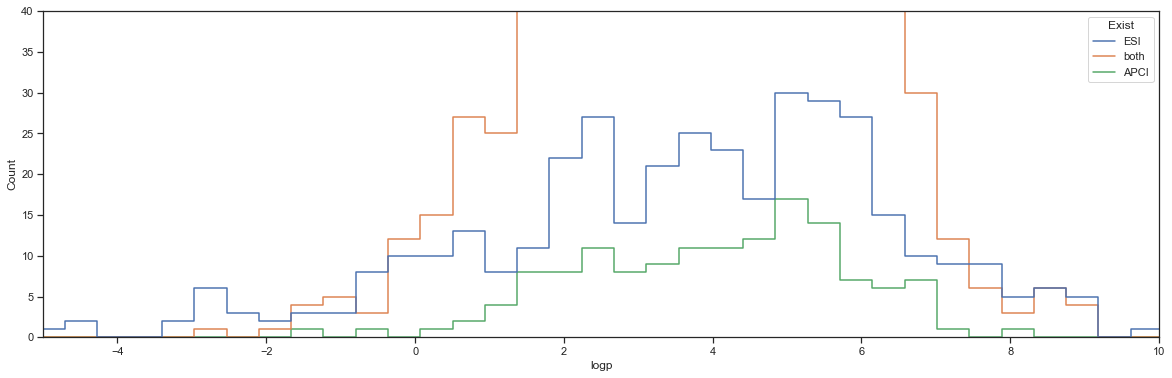

In [12]:
file_name = "zoom_logp_esi_apci_both"
plt.figure(figsize=(20, 6))
sns.set_theme(style="ticks")
ax = sns.histplot(data=df_diff_filtered, x="logp", hue="Exist", fill=False, element="step")
# ax.set(xlabel='m/z', ylabel='LogP')
ax.set_xlim(-5, 10)
ax.set_ylim(0, 40)
# save_fig(file_name)

(-5.0, 10.0)

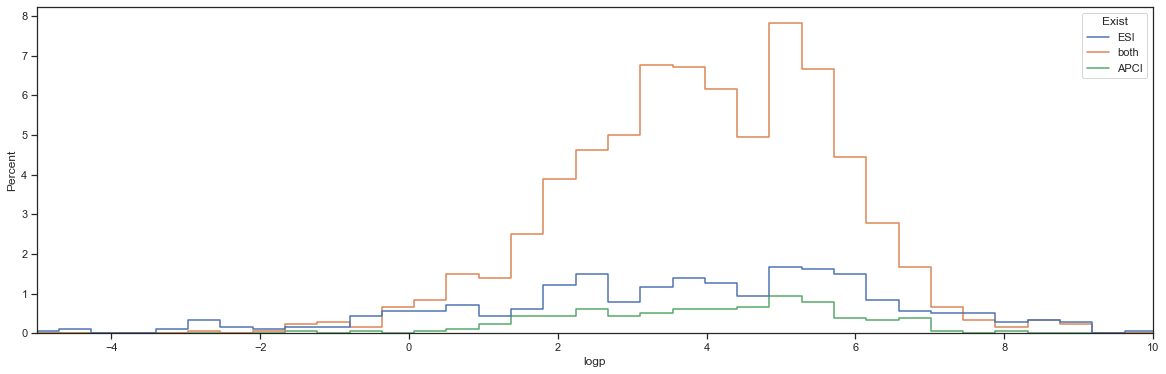

In [13]:
plt.figure(figsize=(20, 6))
sns.set_theme(style="ticks")
ax = sns.histplot(data=df_diff_filtered, x="logp", hue="Exist", fill=False, element="step",
                  stat="percent")
# ax.set(xlabel='m/z', ylabel='LogP')
ax.set_xlim(-5, 10)
# ax.set_ylim(-25, 25)

## Feature table comparison

In [95]:
from rdkit.Chem import Descriptors, AllChem as Chem

In [99]:
def height_extraction(df):
  col = [
    'compound_db_identity:compound_name',
    'compound_db_identity:smiles'
  ]
  df = df.set_index(col)
  ## filter table, loop columns
  ids = "|".join(libdf["unique_sample_id"])
  df = df.filter(regex="height", axis=1).filter(regex=ids, axis=1)
  df["max_height"] = df.max(axis=1)
  df = df.sort_values(by="max_height", ascending=False).reset_index().drop_duplicates(
      'compound_db_identity:smiles').set_index(col).dropna(subset="max_height")

  return df.filter(regex="max_height", axis=1)


def logp_calculation(df, smiles_col="smiles"):
  df["mol"] = [Chem.MolFromSmiles(smiles) for smiles in df[smiles_col]]
  df["logp"] = [Descriptors.MolLogP(mol) if notnull(mol) else np.NAN for mol in df["mol"]]
  df = df.drop(columns=["mol"])
  return df


In [93]:
feature_apci = r"C:\git\msn_library\data\apci_esi_comparison\apci.csv"
feature_esi = r"C:\git\msn_library\data\apci_esi_comparison\esi.csv"

In [94]:
dfa = pu.read_dataframe(feature_apci)
dfe = pu.read_dataframe(feature_esi)

In [96]:
dfa = height_extraction(dfa)
dfe = height_extraction(dfe)

In [98]:
df_merge = pd.merge(dfa, dfe, left_index=True, right_index=True, how="outer",
                    suffixes=("_apci", "_esi"))
df_merge = df_merge.reset_index()

In [100]:
df_merge = logp_calculation(df_merge, "compound_db_identity:smiles")

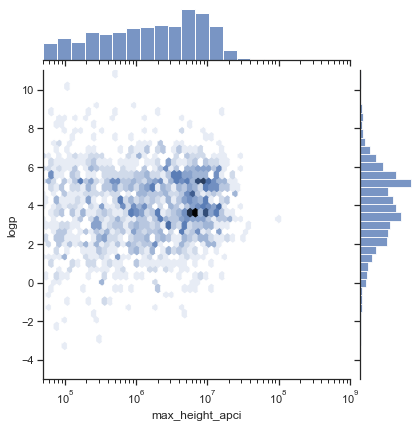

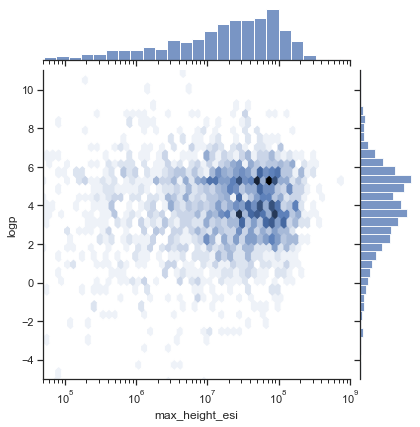

In [110]:
file_name = "apci_height_logp"
sns.jointplot(data=df_merge, x="max_height_apci", y="logp", kind="hex",
              xscale="log",
              xlim=(5E4, 1E9),
              ylim=(-5, 11),
              )
save_fig(file_name)

file_name = "esi_height_logp"
sns.jointplot(data=df_merge, x="max_height_esi", y="logp", kind="hex",
              xscale="log",
              xlim=(5E4, 1E9),
              ylim=(-5, 11),
              )
save_fig(file_name)

In [116]:
libdf

,unique_sample_id
0,pluskal_mce_1D1_A3_id
3,pluskal_mce_1D1_A4_id
7,pluskal_mce_1D1_A5_id
10,pluskal_mce_1D1_A8_id
13,pluskal_mce_1D1_A10_id
...,...
789,pluskal_mce_1D3_L5_id
792,pluskal_mce_1D3_L7_id
795,pluskal_mce_1D3_L9_id
800,pluskal_mce_1D3_L11_id


In [114]:
fulllibbfile = r"C:\git\msn_library\data\library\mce_library_all_cleaned.tsv"
fulllib = pu.read_dataframe(fulllibbfile)

C:\git\msn_library\pandas_utils.py:34: DtypeWarning: Columns (139) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep="\t")


In [115]:
fulllib = 

,VialCode,Batch No.,CAS No.,Cat. No.,Clinical Information,Information,M.Wt,Pathway,Plate Location,Quantity,...,topical,unichem_id,unichem_url,unii,unique_sample_id,usan_stem_definition,well_location,withdrawn,zinc_id,logp
0,NaN,21769.0,719277-26-6,HY-15338,No Development Reported,TG003 is a potent inhibitor of Clk1/Sty; inhib...,249.33,Cell Cycle/DNA Damage,A2,10mM * 30uL,...,False,536135.0,https://www.ebi.ac.uk/unichem/compoundsources?...,KPC5K8BPP7,pluskal_mce_1D1_A1_id,NaN,A1,False,ZINC000004793192,3.05760
1,NaN,58208.0,864953-39-9,HY-15440B,Launched,Fostemsavir Tris (BMS-663068 (Tris)) is the ph...,704.62,Anti-infection,A3,10mM * 30uL,...,False,27308585.0,https://www.ebi.ac.uk/unichem/compoundsources?...,97IQ273H4L,pluskal_mce_1D1_A1_id,phosphoro-derivatives; antivirals,A1,False,ZINC000014210883,1.16812
2,NaN,63377.0,2304503-05-5,HY-114315,No Development Reported,NQO1 substrate acts as an efficient NQO1 subst...,268.18,Others,A4,10mM * 30uL,...,False,169904344.0,https://www.ebi.ac.uk/unichem/compoundsources?...,NaN,pluskal_mce_1D1_A1_id,NaN,A1,False,NaN,1.70956
3,NaN,6410.0,761436-81-1,HY-15357,No Development Reported,ALK inhibitor 1 (compound 17) is a potent pyri...,562.48,Protein Tyrosine Kinase/RTK,A5,10mM * 30uL,...,NaN,28712891.0,https://www.ebi.ac.uk/unichem/compoundsources?...,NaN,pluskal_mce_1D1_A1_id,NaN,A1,NaN,ZINC000101773780,3.39480
4,NaN,11223.0,176957-55-4,HY-15880,No Development Reported,CCT007093 is an effective protein phosphatase ...,272.39,Apoptosis; Autophagy; Metabolic Enzyme/Protease,A6,10mM * 30uL,...,False,254196.0,https://www.ebi.ac.uk/unichem/compoundsources?...,NaN,pluskal_mce_1D1_A1_id,NaN,A1,False,ZINC000004693425,4.63950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,NaN,NaN,NaN,HY-101916,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,169127656.0,https://www.ebi.ac.uk/unichem/compoundsources?...,NaN,pluskal_mce_1D3_L19_id,NaN,L19,NaN,NaN,-10.14740
10500,NaN,NaN,NaN,HY-17567C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,pluskal_mce_1D3_L19_id,NaN,L19,NaN,NaN,NaN
10501,NaN,NaN,NaN,HY-107910,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,91074477.0,https://www.ebi.ac.uk/unichem/compoundsources?...,NaN,pluskal_mce_1D3_L19_id,NaN,L19,NaN,ZINC000214489228,3.94290
10502,NaN,NaN,NaN,HY-17567B,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75247317.0,https://www.ebi.ac.uk/unichem/compoundsources?...,NaN,pluskal_mce_1D3_L19_id,NaN,L19,NaN,NaN,-4.94240


In [117]:
libmerge = libdf.merge(fulllib, on="unique_sample_id", how="left")

In [118]:
libmerge

,unique_sample_id,VialCode,Batch No.,CAS No.,Cat. No.,Clinical Information,Information,M.Wt,Pathway,Plate Location,...,target,topical,unichem_id,unichem_url,unii,usan_stem_definition,well_location,withdrawn,zinc_id,logp
0,pluskal_mce_1D1_A3_id,NaN,39013.0,253863-00-2,HY-16273A,Phase 1,L-778123 hydrochloride is an inhibitor of FPTa...,442.34,Metabolic Enzyme/Protease,C2,...,Farnesyl Transferase,False,606537.0,https://www.ebi.ac.uk/unichem/compoundsources?...,31ZXM8ZKQ3,NaN,A3,False,ZINC000053070632,3.30528
1,pluskal_mce_1D1_A3_id,NaN,9525.0,1240299-33-5,HY-16079,Phase 1,AZD3514 is a potent and oral androgen receptor...,519.56,Others,C3,...,Androgen Receptor,False,28806902.0,https://www.ebi.ac.uk/unichem/compoundsources?...,127DSS8X7J,NaN,A3,False,ZINC000101673084,2.82720
2,pluskal_mce_1D1_A3_id,NaN,34752.0,1446817-84-0,HY-117632,Phase 2,"ABX-1431 is a highly potent, selective, and or...",507.39,Metabolic Enzyme/Protease,C4,...,MAGL,False,65764451.0,https://www.ebi.ac.uk/unichem/compoundsources?...,FB39E94UXK,enzyme inhibitors,A3,False,NaN,5.05300
3,pluskal_mce_1D1_A3_id,NaN,10602.0,55778-02-4,HY-15478,No Development Reported,"WZ811 is an orally active, highly potent compe...",290.36,GPCR/G Protein; Immunology/Inflammation,C5,...,CXCR,False,542293.0,https://www.ebi.ac.uk/unichem/compoundsources?...,NaN,NaN,A3,False,ZINC000028863086,3.70080
4,pluskal_mce_1D1_A3_id,NaN,16164.0,78281-72-8,HY-17357,Launched,Nepafenac(AHR 9434; AL 6515; Nevanac) is a sel...,254.28,Immunology/Inflammation,C6,...,COX,True,199226.0,https://www.ebi.ac.uk/unichem/compoundsources?...,0J9L7J6V8C,anti-inflammatory agents (acetic acid derivati...,A3,False,ZINC000005162311,1.52760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,pluskal_mce_1D3_L13_id,NaN,NaN,NaN,HY-B1896B,NaN,NaN,NaN,NaN,NaN,...,Parasite,False,530399.0,https://www.ebi.ac.uk/unichem/compoundsources?...,A0HV2Q956Y,NaN,L13,False,ZINC000026251015,5.42410
2323,pluskal_mce_1D3_L13_id,NaN,NaN,NaN,HY-B0274A,NaN,NaN,NaN,NaN,NaN,...,Bacterial; Dopamine Receptor; Histamine receptor,False,465320.0,https://www.ebi.ac.uk/unichem/compoundsources?...,9S7OD60EWP,NaN,L13,False,ZINC000000001137,5.18800
2324,pluskal_mce_1D3_L13_id,NaN,NaN,NaN,HY-n0410,NaN,NaN,NaN,NaN,NaN,...,Others,False,212897.0,https://www.ebi.ac.uk/unichem/compoundsources?...,U45VN859W3,NaN,L13,False,ZINC000049888788,5.84900
2325,pluskal_mce_1D3_L13_id,NaN,NaN,NaN,HY-N0171A,NaN,NaN,NaN,NaN,NaN,...,apoptosis,False,285826.0,https://www.ebi.ac.uk/unichem/compoundsources?...,S347WMO6M4,NaN,L13,False,ZINC000004095717,8.02480


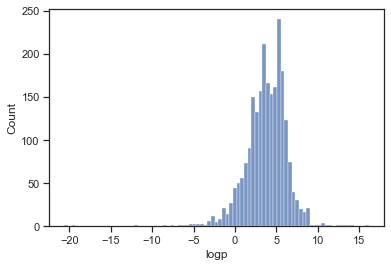

In [127]:
ax = sns.histplot(libmerge, x="logp"
             )
# ax.set_xlim(0, 2000)

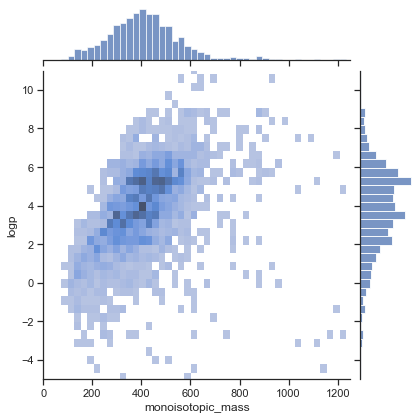

In [137]:
file_name = "logp_lib_subset"
sns.jointplot(data=libmerge, x="monoisotopic_mass", y="logp", kind="hist",
  xlim=(0, 1250),
  ylim=(-5, 11)
  )
save_fig(file_name)